In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def format_p_value(col):
    sig_code_dict = {
        0.001: '***',
        0.01: '**',
        0.05: '*',
        0.1: '.'
    }

    sig_codes = []
    for p in col:
        local_sig_code = ' '
        for sig_level, sig_code in sig_code_dict.items():
            if p < sig_level:
                local_sig_code = sig_code
                break
        sig_codes.append(local_sig_code)

    return sig_codes

In [3]:
years = [2019, 2020, 2021] # 

all_ll_df = []
for year in years:
    ll_df = pd.read_csv(f'../data/fig3/{year}_fixlogreg_ll_POI_Inter_and_JS.csv').drop(columns=['Unnamed: 0'])
    ll_df['year'] = year

    ll_df['p (Demo.)'] = format_p_value(ll_df['p_value..No.Demo.'])
    ll_df['p (POI)'] = format_p_value(ll_df['p_value..No.POI.'])
    ll_df['p (Phy. Barr.)'] = format_p_value(ll_df['p_value..No.PhyDist.'])
    ll_df['p (Admin.)'] = format_p_value(ll_df['p_value..No.Admin.'])

    ll_df = ll_df.rename(columns={
        'LR.Stat..No.Demo.': 'Demographics',
        'LR.Stat..No.POI.': 'POI',
        'LR.Stat..No.PhyDist.': 'Physical Barrier',
        'LR.Stat..No.Admin.': 'Admin. Boundary'
    })
    ll_df = ll_df.drop(columns=['Full', 'No.Demographics', 'No.POI', 'No.PhyDist', 'p_value..No.Demo.', 'p_value..No.POI.', 'p_value..No.PhyDist.', 'p_value..No.Admin.'])
    denominator = ll_df['Demographics'] + ll_df['POI'] + ll_df['Physical Barrier'] + ll_df['Admin. Boundary']
    ll_df['demo_norm'] = ll_df['Demographics'] / denominator
    ll_df['poi_norm'] = ll_df['POI'] / denominator
    ll_df['phy_norm'] = ll_df['Physical Barrier'] / denominator
    ll_df['admin_norm'] = ll_df['Admin. Boundary'] / denominator

    all_ll_df.append(ll_df)
all_ll_df = pd.concat(all_ll_df, ignore_index=True)

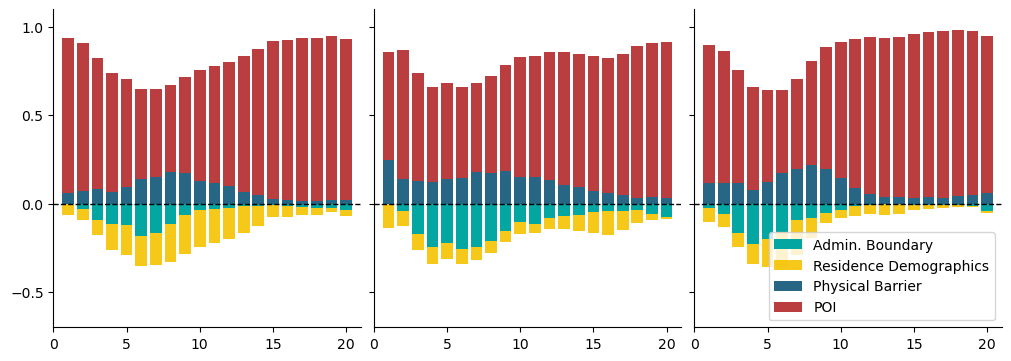

In [4]:
bar_width = 0.8
x = np.arange(1,len(ll_df)+1)
# colors = ['#276685', '#FFC107', '#b3292a', '#03A6A1']
colors = ['#276685', '#f6c200', '#b3292a', '#03A6A1']

f, axes = plt.subplots(1, len(years), figsize=(10, 3.5), sharey=True, constrained_layout=True)

for i, year in enumerate(years):
    local_ax = axes[i]
    local_ll_df = all_ll_df[all_ll_df['year'] == year]

    local_ax.bar(x, -local_ll_df['admin_norm'], bar_width, label='Admin. Boundary', color=colors[3])
    local_ax.bar(x, -local_ll_df['demo_norm'], bar_width, bottom=-local_ll_df['admin_norm'], label='Residence Demographics', color=colors[1], alpha=0.9)
    local_ax.bar(x, local_ll_df['phy_norm'], bar_width, label='Physical Barrier', color=colors[0])
    local_ax.bar(x, local_ll_df['poi_norm'], bar_width, bottom=local_ll_df['phy_norm'], label='POI', color=colors[2], alpha=0.9)

    local_ax.hlines(y=0, xmin=0, xmax=len(ll_df)+1, linestyles='--', colors='black', lw=1)
    sns.despine(top=True, right=True)
    local_ax.set_ylim(-0.7, 1.1)
    local_ax.set_yticks([-0.5, 0, 0.5, 1.0])
    local_ax.set_xlim(0, len(local_ll_df)+1)

    local_ax.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10, loc='lower right')
plt.savefig(f"../outputs/fig3_b.pdf", dpi=300, bbox_inches='tight')